<a href="https://colab.research.google.com/github/riyab22/Projects/blob/main/RB_Predicting_House_Prices.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Predicting House Prices in King County with Linear Regression

## Problem Statement
---------------------------

The problem on hand is to predict the price of a home based on a collection of specific characteristics describing it. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices.

<img src="https://static.seattletimes.com/wp-content/uploads/2018/10/111313-780x502.jpg" title="source: imgur.com" />

----------------------------
## Data Information
---------------------------



Attribute Information (in order):


--------------------------------------------
- id
- date
- price
- bedrooms
- bathrooms
- sqft_living
- sqft_lot      
- floors         
- waterfront     
- view            
- condition       
- grade          
- sqft_above     
- sqft_basement   
- yr_built        
- yr_renovated    
- zipcode         
- lat            
- long           
- sqft_living15   
- sqft_lot15   




[Link to detailed variable definitions](https://github.com/shwetapai/Predicting-House-Prices-in-King-County)

### We will start be importing the necessary libraries

In [ ]:
# import libraries for data manipulation
import pandas as pd
import numpy as np

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.gofplots import ProbPlot

# import libraries for building linear regression model
from statsmodels.formula.api import ols
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression

# import library for preparing data
from sklearn.model_selection import train_test_split

# import library for data preprocessing
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

### In-class exercises
Please complete the code to complete the data exploration tasks while referencing the Boston Housing example. **You are not expected to write observations for this assignment, but it may be worthwhile to pause and think about how you might describe the patterns you are seeing in the results**.

### Problem 1: Read in the data

In [ ]:
import requests
import pandas as pd
from io import StringIO

# your code
orig_url="https://drive.google.com/file/d/1LCzn7gSEr40BpMDx09JPk8iPulvOoniV/view?usp=drive_link"

file_id = orig_url.split('/')[-2]
dwn_url='https://drive.google.com/uc?export=download&id=' + file_id
url = requests.get(dwn_url).text
csv_raw = StringIO(url)
df = pd.read_csv(csv_raw, sep=",")
df.head()


,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Problem 2: Get some information about the dataset using the info() method

In [ ]:
# Your Code
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

* There are a total of 21613 non-null observations in each of the columns. This indicates that there are no missing values in the data.

* All columns in this dataset are numeric in nature except for the date.

### Drop the date variable for now
it will be problematic in numerical computations.

In [ ]:
df=df.drop('date', axis=1)

---------------------------
## Let's now check the summary statistics of this dataset
---------------------------

### Problem 3: Write the code to find the summary statistics.

In [ ]:
# Your code
df.describe()


,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


### Observations

---------------------------
## Univariate Analysis
---------------------------

### Problem 4: Check the distributions of the variables

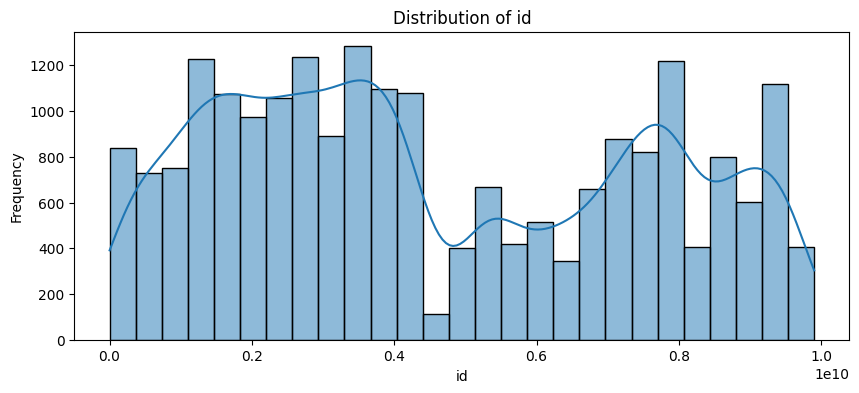

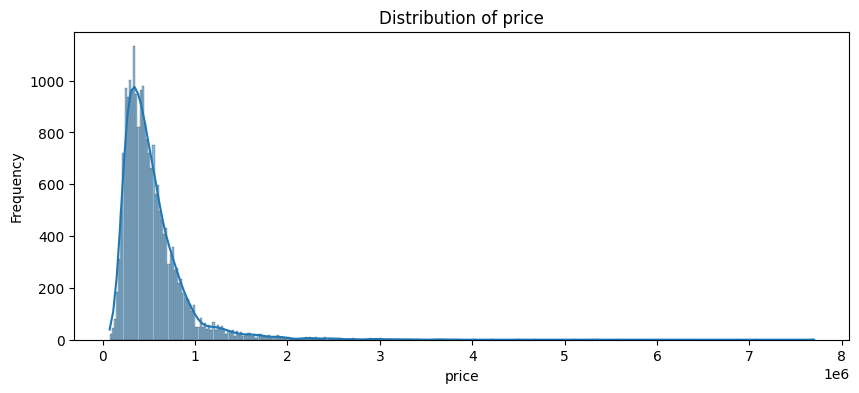

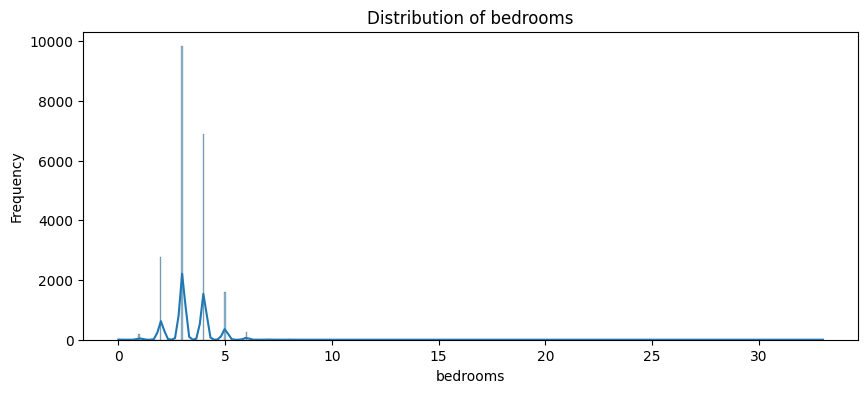

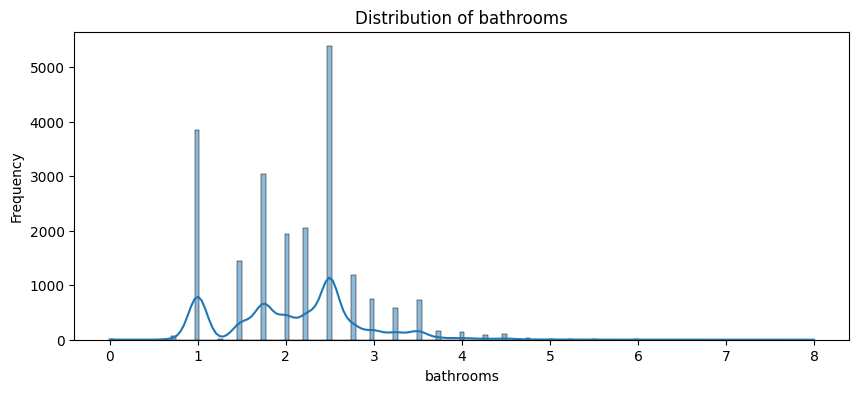

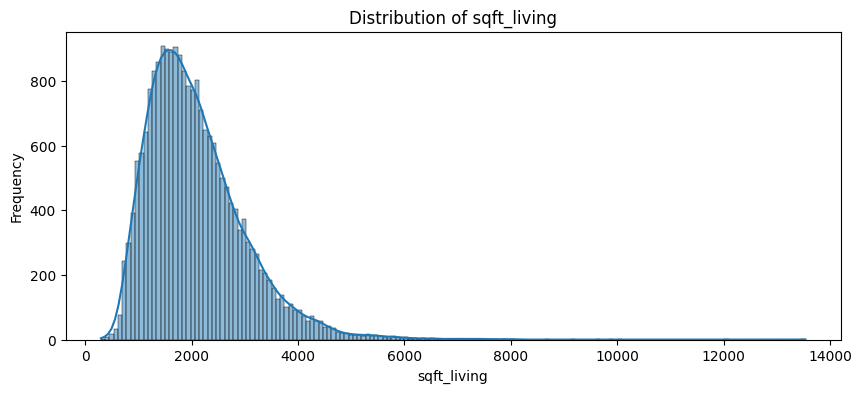

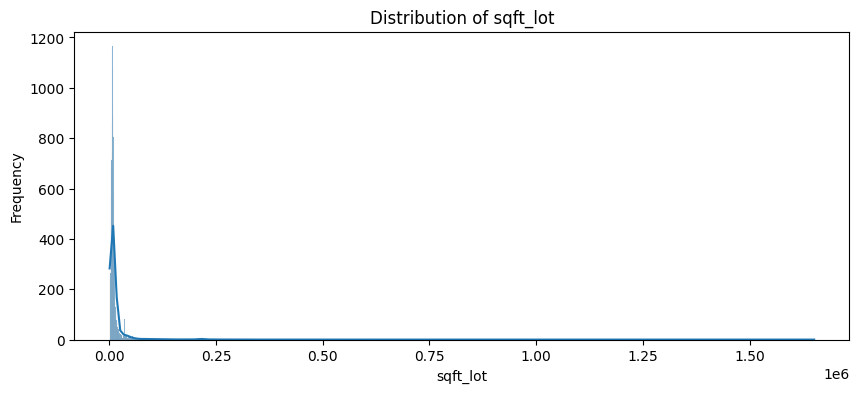

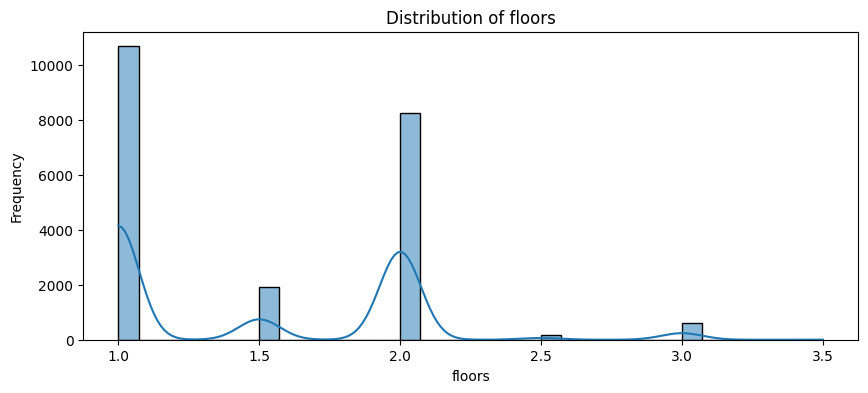

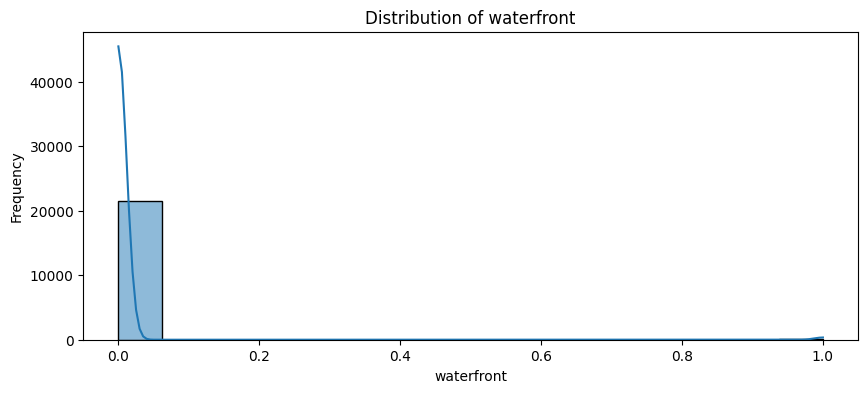

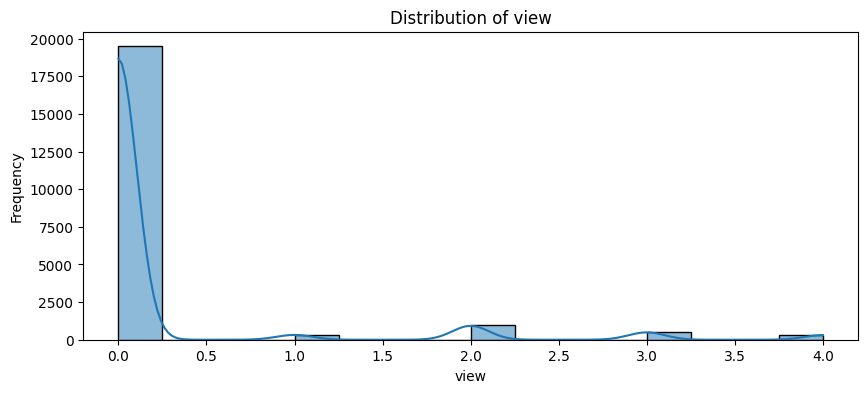

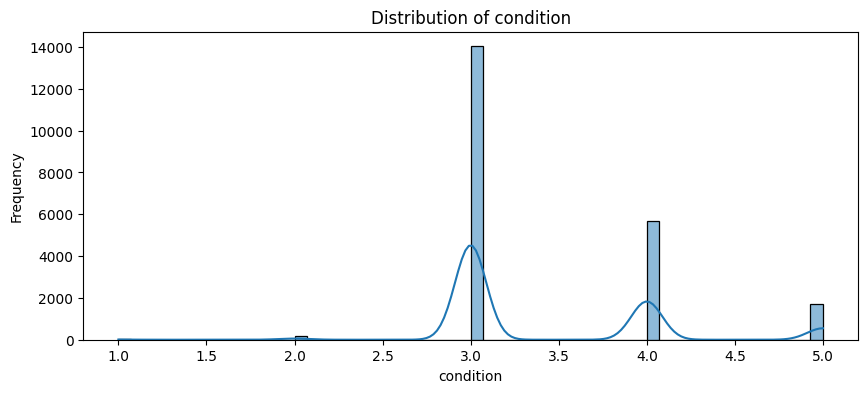

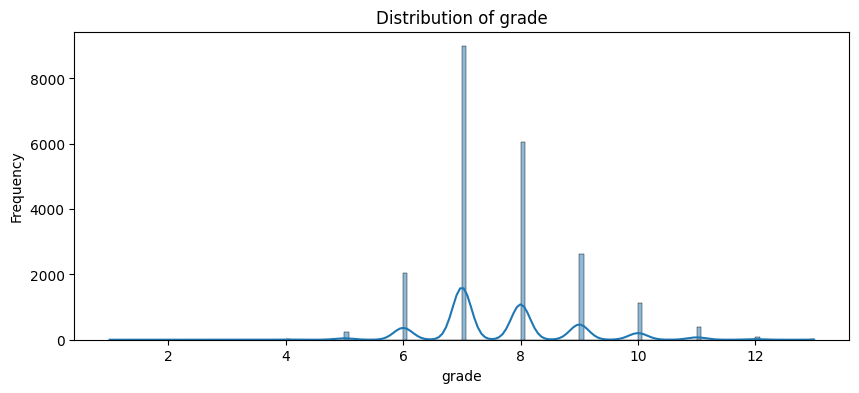

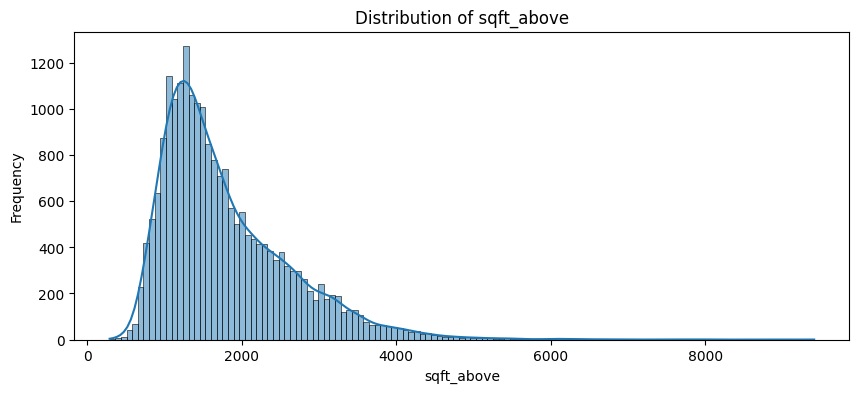

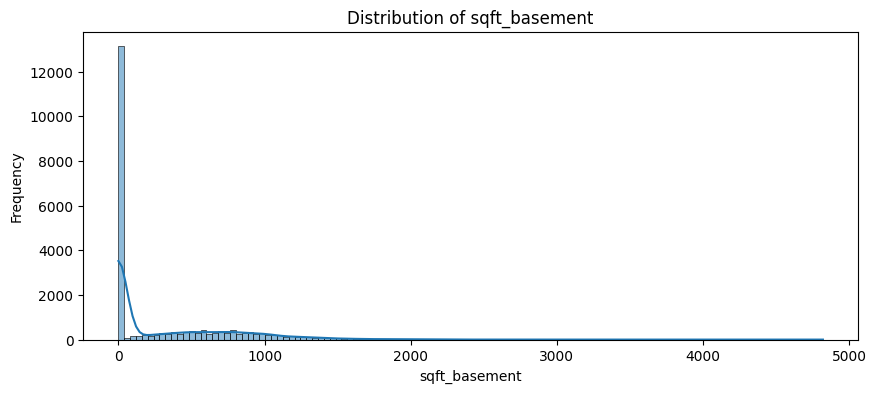

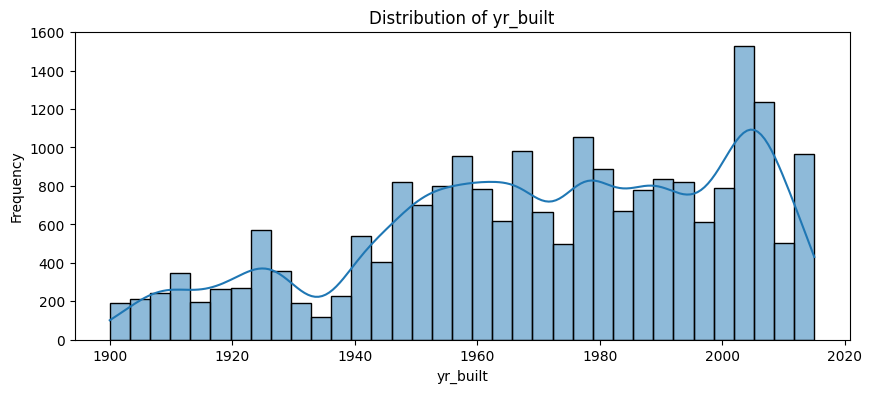

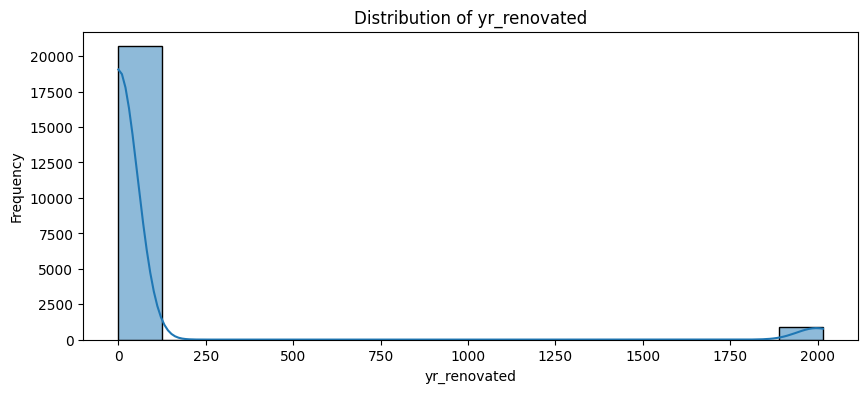

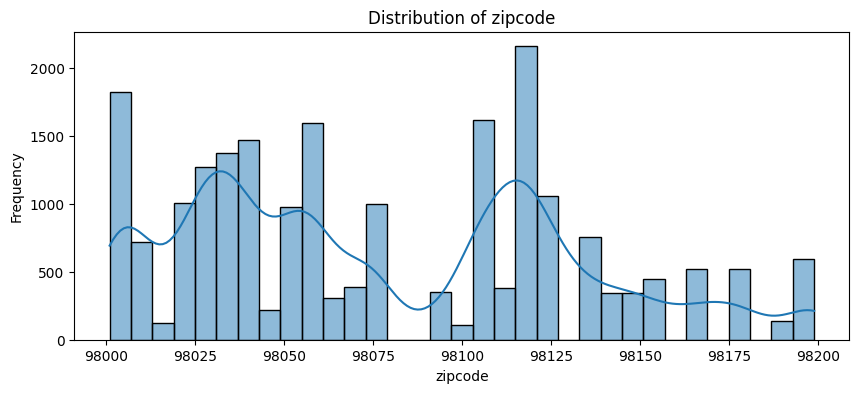

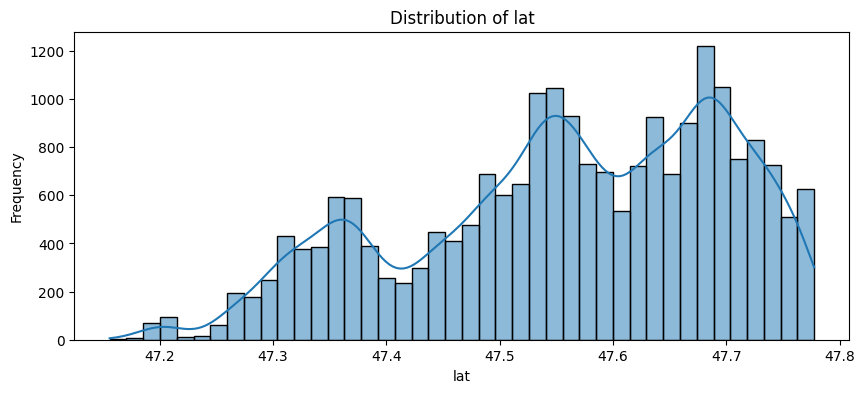

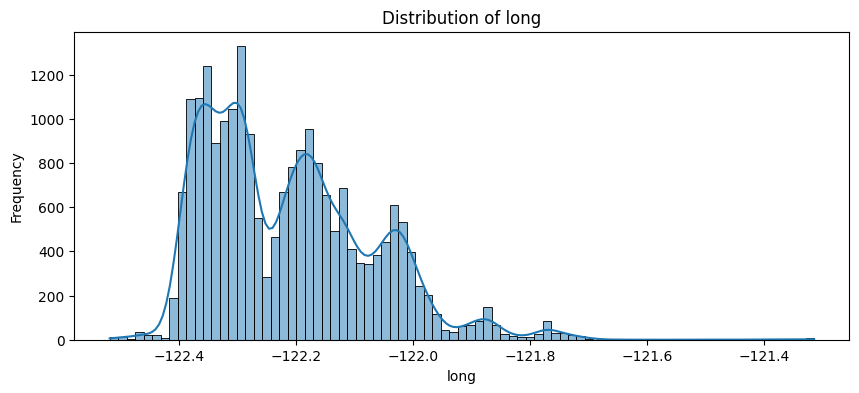

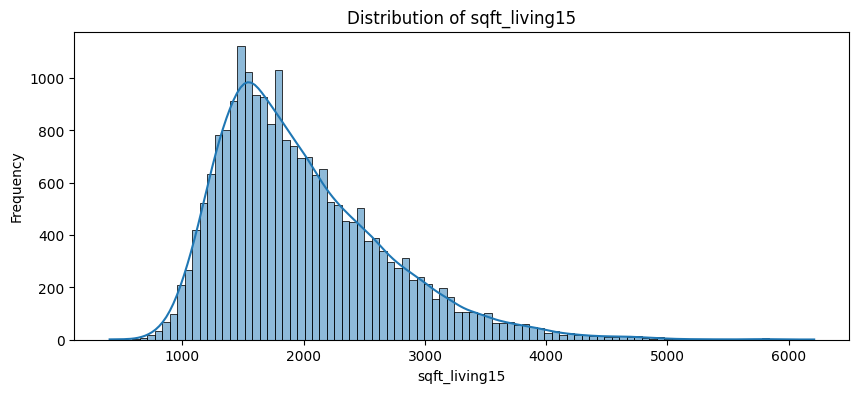

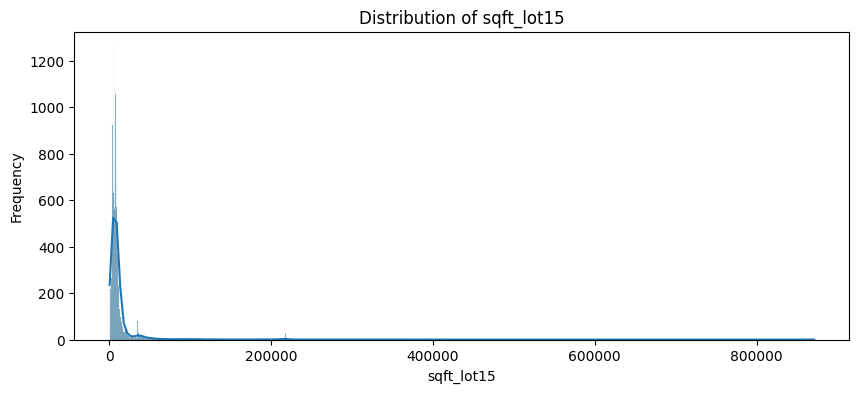

In [ ]:
# let's plot all the columns to look at their distributions
# Your code
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Categorical columns (change this if you have categorical columns)
# categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

# Plot distributions for numerical columns
for column in numerical_columns:
    plt.figure(figsize=(10, 4))
    sns.histplot(df[column], kde=True)
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()


### Observations

The target variable is slightly skewed. In such cases it is a good idead to apply a log transformation in order to avoid contradicting the assumption of linearity which is a necessary condition for applying a linear regression model.

In [ ]:
df['price_log'] = np.log(df['price'])

<Axes: xlabel='price_log', ylabel='Count'>

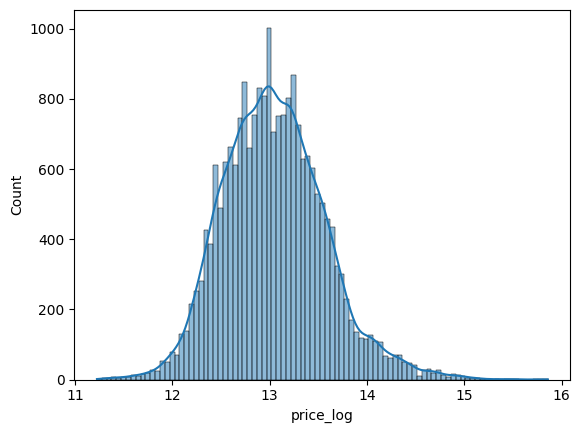

In [ ]:
sns.histplot(data=df, x='price_log', kde = True)

### Observations
- The log-transformed variable (**price_log**) appears to have a **nearly normal distribution without skew**, and hence we can proceeed.



Another assumption that is necessary for using a linear regression model is that the independent variables are independent. If this condition is met, we can be relatively sure that the variable contribute unique information to the model. This can be checked by examining the relationships between the feature variables and examining the correlation matrix for multicollinearity.

---------------------------
## Bivariate Analysis
---------------------------


### Problem 5: check the correlation using the heatmap

- **Write the code to plot the correlation heatmap between the variables**

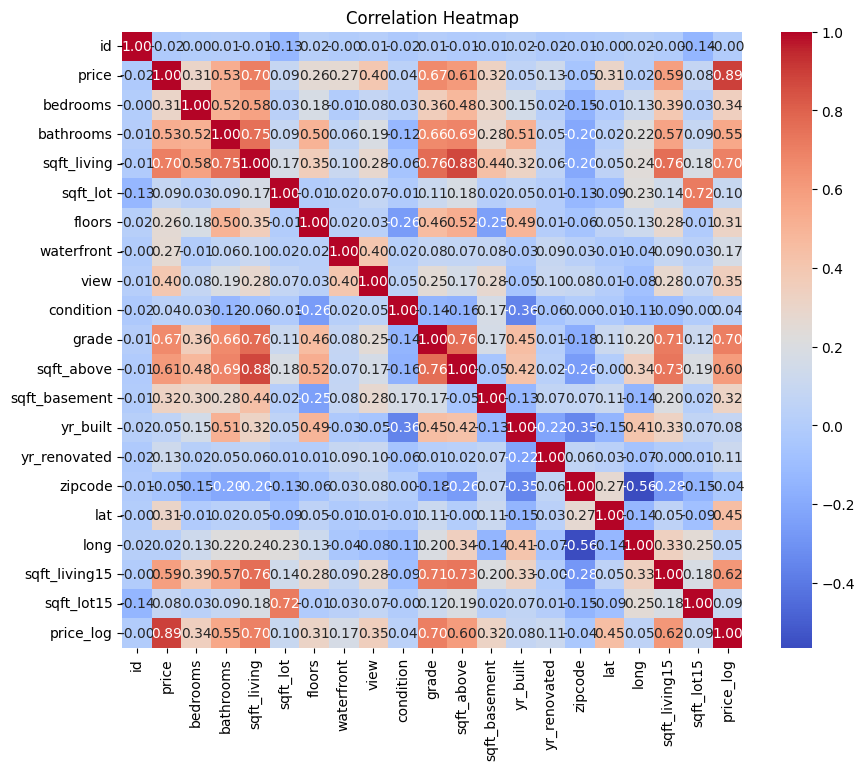

In [ ]:
# Check the correlations
corr_matrix = df.corr()

# Now, plot the heatmap using the newly calculated correlation matrix
plt.figure(figsize=(10, 8))  # Adjust the size as needed
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

**Observations:______**  
Positive correlations of note are observed between:

**sqft_living** and **bathrooms**   
**sqft_living** and **grade**   
**sqft_living** and **sqft_above**   
**sqft_living** and **sqft_living15**    
**sqft_lot** and **sqft_lot15**  
**sqft_above** and **sqft_lot15**   

Negative correlations of note are observed between:

None




### Problem 6: Create a scatter plot to visualize the relationship between the features having significant correlations (>0.7)**

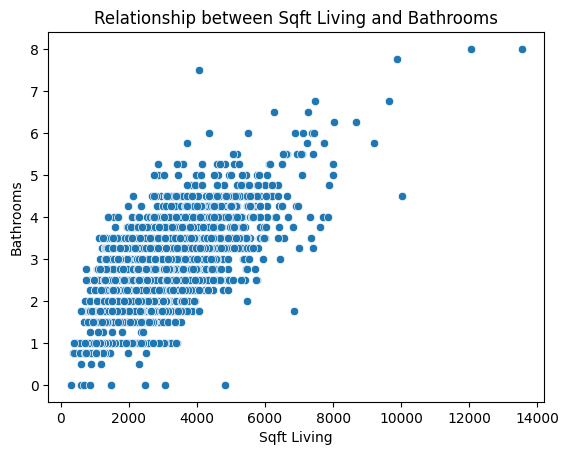

In [ ]:
# scatterplot to visualize the relationship between sqft_living and bathrooms
# Your Code
sns.scatterplot(data=df, x='sqft_living', y='bathrooms')
plt.title('Relationship between Sqft Living and Bathrooms')
plt.xlabel('Sqft Living')
plt.ylabel('Bathrooms')
plt.show()


### Observations

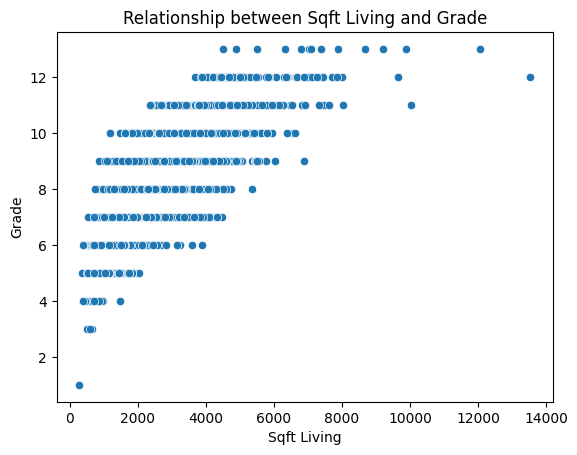

In [ ]:
# scatterplot to visualize the relationship between sqft_living and grade
# Your Code
sns.scatterplot(data=df, x='sqft_living', y='grade')
plt.title('Relationship between Sqft Living and Grade')
plt.xlabel('Sqft Living')
plt.ylabel('Grade')
plt.show()


### Observations

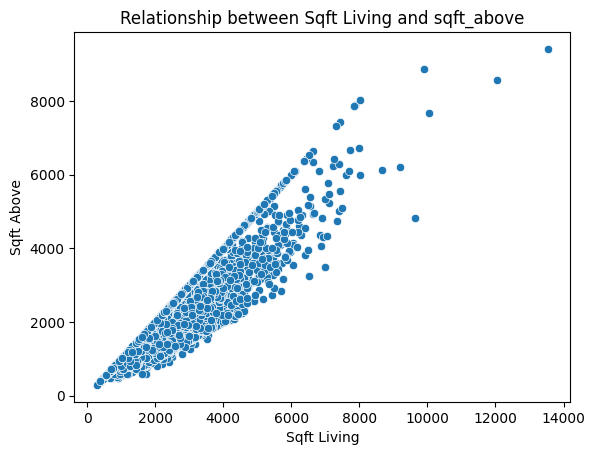

In [ ]:
# scatterplot to visualize the relationship between sqft_living and sqft_above
# Your Code
sns.scatterplot(data=df, x='sqft_living', y='sqft_above')
plt.title('Relationship between Sqft Living and sqft_above')
plt.xlabel('Sqft Living')
plt.ylabel('Sqft Above')
plt.show()


### Observations

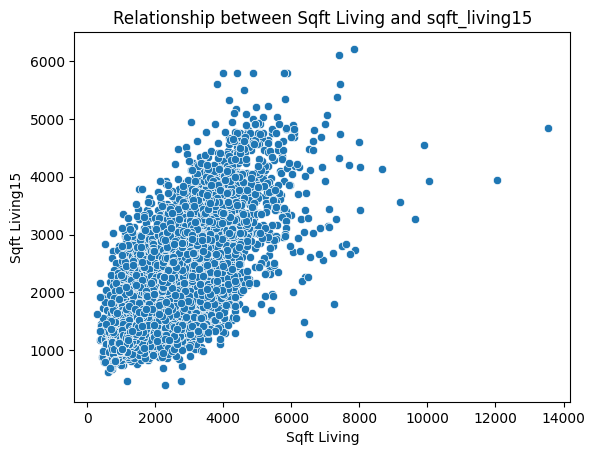

In [ ]:
# scatterplot to visualize the relationship between sqft_living and sqft_living15
# Your Code
sns.scatterplot(data=df, x='sqft_living', y='sqft_living15')
plt.title('Relationship between Sqft Living and sqft_living15')
plt.xlabel('Sqft Living')
plt.ylabel('Sqft Living15')
plt.show()


### Observations

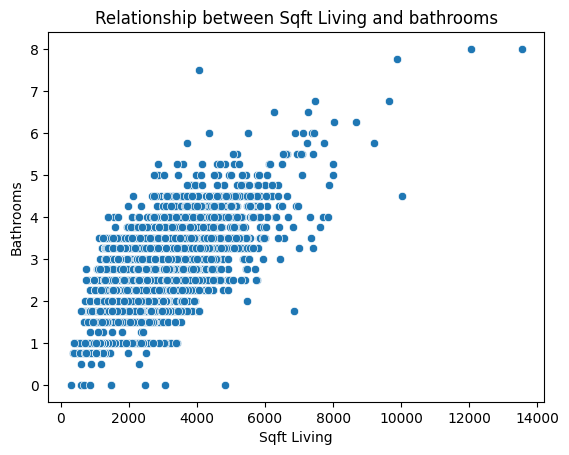

In [ ]:
# scatterplot to visualize the relationship between sqft_living and bathrooms
# Your Code
sns.scatterplot(data=df, x='sqft_living', y='bathrooms')
plt.title('Relationship between Sqft Living and bathrooms')
plt.xlabel('Sqft Living')
plt.ylabel('Bathrooms')
plt.show()


The correlation is likely high due to outliers. We can remove these extreme values and check the correlation on the truncated data.

In [ ]:
# remove the data corresponding to high sqft_lot
dft = df[df['sqft_lot'] < 125000]
dft=dft[dft['sqft_lot15'] < 600000]
# import the required function
from scipy.stats import pearsonr
# calculate the correlation
print('The correlation between sqft_lot and sqft_lot15 is', pearsonr(dft['sqft_lot'], dft['sqft_lot15'])[0])

The correlation between sqft_lot and sqft_lot15 is 0.7349498748682619


The correlation is still above 73, therefore we cannot conclude that the strong association is due to outliers alone.

### Observations

There appear to be associations between some pairs of feature variables. This is not desiearable for linear regression.

---------------------------
## Partitioning the Data
---------------------------


### Problem 7: Separate the target variable from the collection of feature variables.

In [ ]:
# separate the dependent and indepedent variable
# Your Code
y = df['price']  # Dependent variable (target)

# Assuming all other columns except 'price' are your independent variables
X = df.drop(['price'], axis=1)
